In [ ]:
#TO-DO
# Suggestions:
# -3) Are different adverse events reported in different countries?
#  X --> make plot for REACTION for different countries
#    --> age splits
#    --> dot product over reaction-space to give single number estimation of "effect overlap"

# -2) What are the different adverse events associated with different disease areas? 
#   --> does disease area mean e.g. drugindication = RHEUMATOID ARTHRITIS
#  X --> make plot of REACTION for drugindiciation
#  X --> make plot of REACTION for most common drug(s) associated with particular indication
#   --> show gender splits?
#   --> show splits by age?

# -1) What drugs tend to be taken together? 
#   --> make list of drug incidence, find most common
#   --> make list of drug-pair incidence, find most common
#  X --> make a correlation matrix of drugs

# Ben Ideas
# X --> Find most common drugs for given drugindication
#  --> For particular drug show N_adverse as a ftn of time/patient age
#  --> Show N_adverse as a function of patient age/sex
#  --> Show N_adverse as a function of dosage
#  --> Learn what seriousness reporting means

In [51]:
import pandas as pd
from pandas.core.common import flatten
import numpy as np
import json
import zipfile
from matplotlib import pyplot as plt

In [2]:
filename='/home/btannenw/Desktop/life/adverseDrugFDA/data/2011-Q3/drug-event-0001-of-0012.json.zip'
#jsonFile = json.loads(open(filename),)
#json.loads(data.decode("utf-8"))
#oneFile = pd.read_json('/home/btannenw/Desktop/life/adverseDrugFDA/data/2011-Q3/drug-event-0001-of-0012.json.zip', 
#                       encoding='utf-8', compression='zip')

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_widgets()

In [3]:
d = []
data = []

with zipfile.ZipFile(filename, 'r') as z:
    for filename in z.namelist():  
        print(filename)  
        with z.open(filename) as f:  
            data = f.read()  
            d = json.loads(data.decode("utf-8"))  

drug-event-0001-of-0012.json


In [4]:
d.keys()
#d['meta']

dict_keys(['meta', 'results'])

In [5]:
df = pd.DataFrame(d['results'])
df

,receivedate,patient,sender,transmissiondate,primarysource,receiptdate,transmissiondateformat,receiptdateformat,receiver,serious,receivedateformat,fulfillexpeditecriteria,safetyreportid,companynumb,seriousnessother,seriousnesshospitalization,seriousnessdeath,seriousnesslifethreatening,seriousnessdisabling,seriousnesscongenitalanomali
0,20111106,{'reaction': [{'reactionmeddrapt': 'SKIN DISCO...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110816,102,102,None,2,102,2,7894609-0,US-AMGEN-USASP2011041867,NaN,NaN,NaN,NaN,NaN,NaN
1,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCULOSKE...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110817,102,102,None,2,102,2,7894626-0,US-AMGEN-USASP2011041937,NaN,NaN,NaN,NaN,NaN,NaN
2,20111106,{'reaction': [{'reactionmeddrapt': 'MUSCLE SPA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110820,102,102,None,2,102,2,7894922-7,US-AMGEN-USASP2011042568,NaN,NaN,NaN,NaN,NaN,NaN
3,20111106,{'reaction': [{'reactionmeddrapt': 'SINUSITIS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110823,102,102,None,2,102,2,7895062-3,US-AMGEN-USASP2011043018,NaN,NaN,NaN,NaN,NaN,NaN
4,20111106,{'reaction': [{'reactionmeddrapt': 'OROPHARYNG...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110824,102,102,None,2,102,2,7895266-X,US-AMGEN-USASP2011043329,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20111106,{'reaction': [{'reactionmeddrapt': 'DIZZINESS'...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110907,102,102,None,2,102,2,7896210-1,US-AMGEN-USASP2011045766,NaN,NaN,NaN,NaN,NaN,NaN
11996,20111106,{'reaction': [{'reactionmeddrapt': 'INJECTION ...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110908,102,102,None,2,102,2,7896407-0,US-AMGEN-USASP2011046000,NaN,NaN,NaN,NaN,NaN,NaN
11997,20111106,{'reaction': [{'reactionmeddrapt': 'ARTHRALGIA...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110909,102,102,None,2,102,2,7896458-6,US-AMGEN-USASP2011046268,NaN,NaN,NaN,NaN,NaN,NaN
11998,20111216,{'reaction': [{'reactionmeddrapt': 'PANCREATIT...,{'senderorganization': 'FDA-Public Use'},20120403,"{'reportercountry': 'UNITED STATES', 'qualific...",20110722,102,102,None,1,102,2,7986537-7,US-BRISTOL-MYERS SQUIBB COMPANY-15919855,1,NaN,NaN,NaN,NaN,NaN


In [6]:
df_source = pd.DataFrame([x for x in df['primarysource'] if x != None])
df_sender = pd.DataFrame([x for x in df.sender if x != None])
df_patient = pd.DataFrame([x for x in df.patient if x != None])

In [143]:
def returnThresholdPoint(counts, labels, threshold, verbose=False):
    """return point where threshold"""

    # *** 0. Find threshold break
    _total = sum(counts)
    _processed = 0
    
    # *** 1. Escape for when you just want the top X in a list regardless of percentage
    if threshold > 1:
        if verbose:
            for iKey in range(0, threshold):
                print( "{}: {:1.2f}%".format(labels[iKey], 100*counts[iKey]/_total))
            print( "{}: {:1.2f}%".format('Other', 100*sum(counts[iKey:])/_total))

        return threshold
    
    # *** 2. Actually calculate point where > X% of sample contained
    for iKey in range(0, len(labels)):
        if _processed/_total < threshold:
            _processed += counts[iKey]
            if verbose:
                print( "{}: {:1.2f}%".format(labels[iKey], 100*counts[iKey]/_total))
                #print( "{}: {} {}".format(labels[iKey], counts[iKey], _total))
        else:
            break
    
    if verbose:
        print( "{}: {:1.2f}%".format('Other', 100*sum(counts[iKey:])/_total))
    
    return iKey


def makePiePlot(counts, labels, threshold=0.9, legend=True, title='', verbose=False):
    """ make pie plot that lumps tail above some threshold into 'other' category """
    
    # *** 0. Find threshold break
    threshKey = returnThresholdPoint(counts, labels, threshold, verbose)
     
    # *** 1. Make counts/labels below threshold and store rest as 'Other'
    _pieCounts = counts.copy()[:threshKey]
    _pieCounts.append( sum(counts[threshKey:]) )
    _pieLabels = labels
    if type(_pieLabels)!=list:
        _pieLabels = _pieLabels.to_list()
    _pieLabels = _pieLabels[:threshKey]
    _pieLabels.append( 'Other')
    
    
    # *** 2. Remove 'Other' if top-X plot rather than with threshold
    if threshold > 1:
        _pieCounts = _pieCounts[:(threshKey-1)]
        _pieLabels = _pieLabels[:(threshKey-1)]

    # *** 3. Make pie plot
    #_colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #_explode = (0.0, ) + (0.2,)*(iKey-1) #explode all slices but one
    _pieOpts = dict(autopct='%1.1f%%', 
                shadow=True, 
                startangle=90
                #explode= _explode, 
                #labels= _pieLabels, 
                #colors= _colors, 
    )
    if not legend:
        _pieOpts['labels'] = _pieLabels
    
    plt.pie(_pieCounts, 
        **_pieOpts
        )
    
    if legend:
        plt.legend( _pieLabels, loc="best")

    plt.axis('equal')
    plt.title( title )
    plt.show()

    
def returnCountsAndLabels(freqPair):
    """return easily digestible list of reactions and counts"""
    
    _reactions = [ pair[0] for pair in freqPair ]
    _counts    = [ int(pair[1]) for pair in freqPair ]
    
    return _reactions, _counts


def countUnique(reactionsList, threshold=0.90, verbose=False):
    
    # *** 0. Make pairs of uniques
    (unique, counts) = np.unique( reactionsList, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    #print(frequencies)
    freq2 = sorted( frequencies, key=lambda pair: int(pair[1]), reverse=True) 
    #print(freq2[:10])
    print( len(frequencies) )
    
    # *** 1. Find threshold break
    _reactions, _counts = returnCountsAndLabels( freq2)
    _threshKey = returnThresholdPoint(_counts, _reactions, threshold, verbose)

    
    return freq2[:_threshKey], freq2


In [366]:
#%%time
def imputePrimarySource(primarySourceInfo, expectedKey):
    """function to impute some dummy info for missing fields"""

    
    if expectedKey in primarySourceInfo.keys():
        dfValue = primarySourceInfo[ expectedKey ]
        
        if dfValue == None:
            return -1
        elif dfValue.isnumeric():
            return float(dfValue)
        else:
            return dfValue
    else:
        return -1
    

def imputePatientReaction(patientInfo, expectedKey):
    """function to impute some dummy info for missing fields"""

    if expectedKey in patientInfo.keys():
        #dfValue = primarySourceInfo[ expectedKey ]
        dfValue = [ reaction.get('reactionmeddrapt') for reaction in patientInfo[ expectedKey]]

        #if typedfValue == None:
        #    return -1
        #elif dfValue.isnumeric():
        #    return float(dfValue)
        #else:
        return dfValue
    else:
        return -1
    
def imputeDrugInfo(patientInfo, expectedKey):
    """function to impute some dummy info for missing fields"""

    if expectedKey in patientInfo['drug'][0]:
        dfValue = patientInfo['drug'][0][ expectedKey ]
        return dfValue
    else:
        return -1
    
    
def imputeDrugName(patientInfo, drugCategory, expectedKey):
    """function to impute some dummy info for missing fields"""

    if drugCategory in patientInfo['drug'][0]:
        if expectedKey in patientInfo['drug'][0][ drugCategory]:
            dfValue = patientInfo['drug'][0][ drugCategory][ expectedKey ]
            #return '-'.join(dfValue)
            return dfValue
        else:
            return 'No Name Given'
    else:
        return 'No Name Given'
    
    
df2 = df.dropna(subset=['primarysource', 'patient'])
df2['reportercountry'] = df2.apply( lambda x: imputePrimarySource( x['primarysource'], 'reportercountry'), axis=1)
df2['reporterqualification'] = df2.apply( lambda x: imputePrimarySource( x['primarysource'], 'qualification'), axis=1)
df2['patientOnsetAge'] = df2.apply( lambda x: imputePrimarySource( x['patient'], 'patientonsetage'), axis=1)
df2['patientReactions'] = df2.apply( lambda x: imputePatientReaction( x['patient'], 'reaction'), axis=1)
df2['drugIndication'] = df2.apply( lambda x: imputeDrugInfo( x['patient'], 'drugindication'), axis=1)
df2['drugGenericName'] = df2.apply( lambda x: imputeDrugName( x['patient'], 'openfda', 'generic_name'), axis=1)
df2['drugBrandName'] = df2.apply( lambda x: imputeDrugName( x['patient'], 'openfda', 'brand_name'), axis=1)

df3= df2[ df2['reportercountry']!=-1 ]

df_USA = df2[ df2['reportercountry']=='UNITED STATES']

print( len(df), len(df2), len(df3), len(df_USA))

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

12000 11997 11975 9740


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


UNITED STATES: 81.34%
UNITED KINGDOM: 2.18%
JAPAN: 2.08%
GERMANY: 1.97%
CANADA: 1.67%
FRANCE: 1.55%
BRAZIL: 1.18%
AUSTRALIA: 0.87%
Other: 7.16%


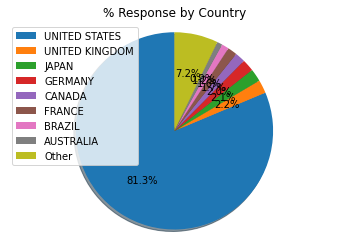

In [144]:
countryCounts = df3.reportercountry.value_counts()

counts = countryCounts.to_list()
countries = countryCounts.keys()

makePiePlot(counts, countries, threshold=0.925, title='% Response by Country', verbose=True)


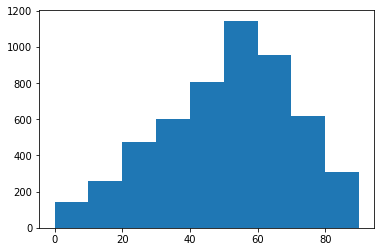

In [46]:
# assume ages >100 are something weird
a, b, c = plt.hist(df3.patientOnsetAge, bins=np.arange(0, 100, 10))
#print(len(ages), max(ages), min(ages))
# adverse affects peak around 50... is that weird?

In [254]:
df3.patient[0]['drug'][0]['openfda']['generic_name']

['ETANERCEPT']

In [62]:
reactions  = list(flatten(df3.patientReactions.to_list()))
#reactions2 =[ reaction.get('reactionmeddrapt') for patient in df.patient for reaction in patient['reaction']]
#get list of all reactions
print( len(reactions), len(set(reactions)))
# shows that there's a lot of reactions (~35k) and a lot of unique reactions (~3k). but since the number of unique
# is so much smaller, that means there should be a lot of correlation --> matrix

35650 3159


In [172]:
df3_under45 = df3[ (df3.patientOnsetAge<45) & (df3.patientOnsetAge>-1) ]
df3_under45_reactions = list(flatten(df3_under45['patientReactions']))

df3_50to60 = df3[ (df3.patientOnsetAge>=50) & (df3.patientOnsetAge<60) & (df3.patientOnsetAge>-1) ]
df3_50to60_reactions = list(flatten(df3_50to60['patientReactions']))

df3_over65 = df3[ (df3.patientOnsetAge>65) & (df3.patientOnsetAge>-1) ]
df3_over65_reactions = list(flatten(df3_over65['patientReactions']))

threshold=10
print(type(df3_under45_reactions), np.shape(df3_under45_reactions))
top10_under45, all_under45 = countUnique(df3_under45_reactions, threshold)
all_reactions_under45, all_counts_under45 = returnCountsAndLabels( all_under45)

top10_50to60, all_50to60 = countUnique(df3_50to60_reactions, threshold)
all_reactions_50to60, all_counts_50to60 = returnCountsAndLabels( all_50to60)

top10_over65, all_over65 = countUnique(df3_over65_reactions, threshold)
all_reactions_over65, all_counts_over65 = returnCountsAndLabels( all_over65)

<class 'list'> (5357,)
1362
970
1148


INJECTION SITE PAIN: 2.45%
DEVICE EXPULSION: 2.31%
INJECTION SITE ERYTHEMA: 1.77%
NAUSEA: 1.77%
HEADACHE: 1.49%
FATIGUE: 1.40%
DRUG INEFFECTIVE: 1.33%
PYREXIA: 1.05%
INJECTION SITE SWELLING: 1.03%
VOMITING: 0.93%
Other: 85.40%


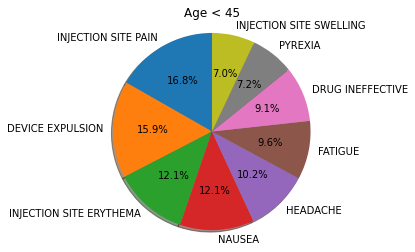

INJECTION SITE PAIN: 2.46%
DRUG INEFFECTIVE: 1.91%
NAUSEA: 1.71%
HEADACHE: 1.60%
DIARRHOEA: 1.52%
FATIGUE: 1.52%
PAIN: 1.52%
INJECTION SITE ERYTHEMA: 1.41%
ARTHRALGIA: 1.24%
PAIN IN EXTREMITY: 1.13%
Other: 85.10%


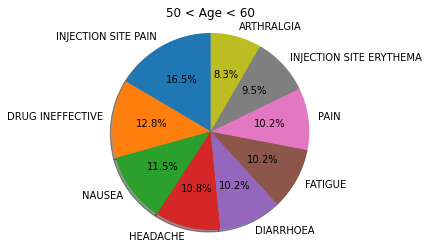

DRUG INEFFECTIVE: 1.65%
NAUSEA: 1.23%
ARTHRALGIA: 1.12%
FALL: 1.12%
DIARRHOEA: 1.10%
DEATH: 1.04%
FATIGUE: 0.97%
PAIN IN EXTREMITY: 0.97%
ASTHENIA: 0.94%
DIZZINESS: 0.94%
Other: 89.86%


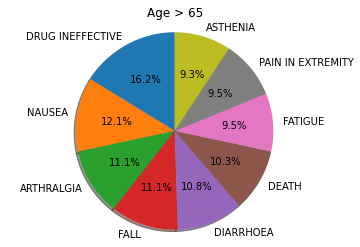

In [98]:
makePiePlot(all_counts_under45, all_reactions_under45, threshold=10, title='Age < 45', legend=False, verbose=True)
makePiePlot(all_counts_50to60, all_reactions_50to60, threshold=10, title='50 < Age < 60', legend=False, verbose=True)
makePiePlot(all_counts_over65, all_reactions_over65, threshold=10, title='Age > 65', legend=False, verbose=True)

In [99]:
topReactions_allAges = list(set(top10_reactions_under45 + top10_reactions_50to60 + top10_reactions_over65))
topReactions_allAges

['DIARRHOEA',
 'PYREXIA',
 'VOMITING',
 'DEVICE EXPULSION',
 'DEATH',
 'PAIN IN EXTREMITY',
 'NAUSEA',
 'FALL',
 'RENAL FAILURE ACUTE',
 'FATIGUE',
 'INJECTION SITE ERYTHEMA',
 'ASTHENIA',
 'INJECTION SITE PAIN',
 'PAIN',
 'HEADACHE',
 'DRUG INEFFECTIVE',
 'ARTHRALGIA',
 'INJECTION SITE SWELLING',
 'DYSPNOEA']

<BarContainer object of 10 artists>

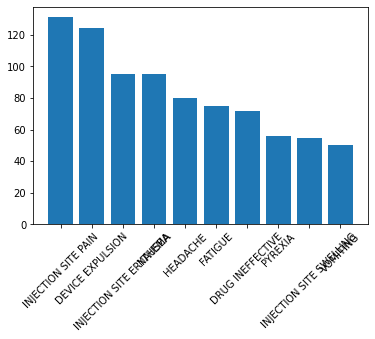

In [69]:
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 10})
plt.bar( top10_reactions_under45, top10_counts_under45)

In [ ]:
#maybe think of some way to store original tuple as dict and then plot n_reactions/n_population for three age groups
# then compare a few common reactions across ages

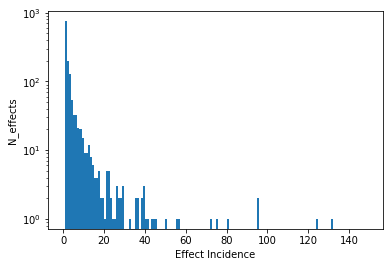

In [70]:
bins=np.arange(0, 150, 1)
plt.hist( all_counts_under45, bins=bins)
plt.xlabel('Effect Incidence')
plt.ylabel('N_effects')
plt.yscale('log')
#turns out most reactions only have < 10 recorded instances. probably focus on things that are much more common

In [381]:
def drawTopReactionsForLabel(_df, columnKey, keyValue, threshold=10, verbose=False):
    """ Are different reactions reported in different countries?"""
    
    _df_key = _df.copy()
    # *** 1. Select by label make flat list of reactions
    if 'Name' in columnKey:
        _df_key = _df_key[ _df_key.drugGenericName != 'No Name Given']
        _df_key = _df_key[ (_df_key.drugGenericName.str.join('-').str.find(keyValue) != -1)]
    else:
        _df_key = _df[ (_df[ columnKey ] == keyValue) ]
    _reactions = list(flatten(_df_key['patientReactions']))

    # *** 2. Get unique counts/labels
    _top10, _all = countUnique(_reactions, threshold)
    _all_reactions, _all_counts = returnCountsAndLabels( _all)

    makePiePlot(_all_counts, _all_reactions, threshold=threshold, title='Top Reactions: {}'.format(keyValue), 
                legend=False, verbose=verbose)
    

def drawTopDrugsForLabel(_df, columnKey, keyValue, drugName, threshold=10, verbose=False):
    """ Are different reactions reported in different countries?"""
    
    # *** 1. Select by country make flat list of reactions
    _df_key = _df[ (_df[ columnKey ] == keyValue) ]
    _drugs = list(flatten(_df_key[ 'drug'+drugName]))

    # *** 2. Get unique counts/labels
    _top10, _all = countUnique(_drugs, threshold)
    _all_drugs, _all_counts = returnCountsAndLabels( _all)
    print(len(_df_key), len(_drugs), len(_all))

    
    makePiePlot(_all_counts, _all_drugs, threshold=threshold, title='Top Drug {}: {}'.format(drugName, keyValue), 
                legend=False, verbose=verbose)

2443


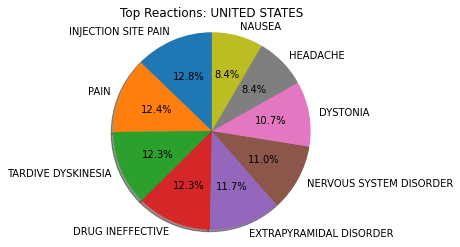

455


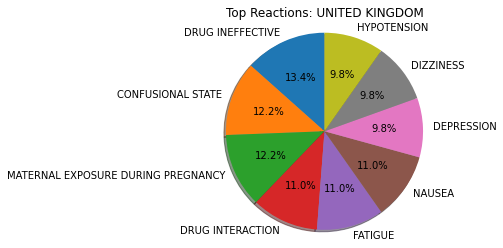

387


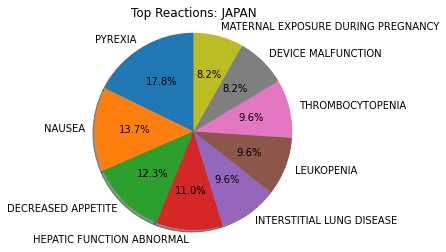

414


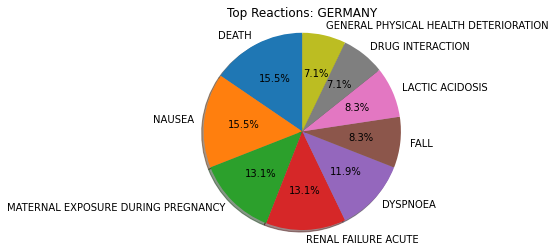

368


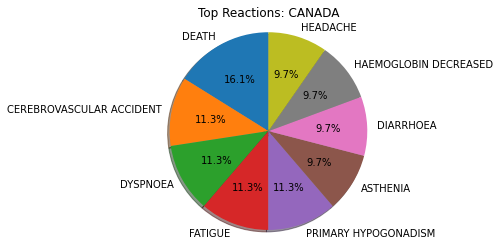

403


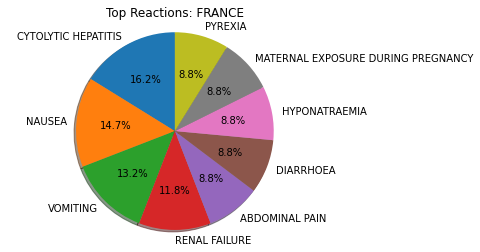

326


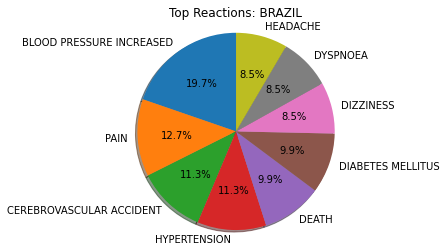

220


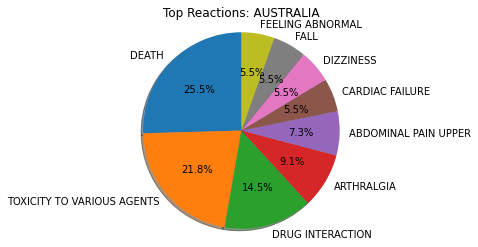

In [307]:
# *** 0. Find threshold break
countryThreshold = 0.925
counts = df3.reportercountry.value_counts().to_list()
countries = df3.reportercountry.value_counts().keys()

threshKey = returnThresholdPoint(counts, countries, countryThreshold)
         
# *** 1. Make counts/labels below threshold and store rest as 'Other'
for iCountry in countries[:threshKey]:
    drawTopReactionsForLabel( df3, 'reportercountry', iCountry)

In [233]:
indicationThreshold =14
df3_indication = df3[ df3.drugIndication!=-1]
counts = df3_indication.drugIndication.value_counts().to_list()
indications = df3_indication.drugIndication.value_counts().keys()
print(len(indications))
threshKey = returnThresholdPoint(counts, indications, indicationThreshold, verbose=True)
topIndications = indications[:indicationThreshold].to_list()

754
RHEUMATOID ARTHRITIS: 15.26%
PRODUCT USED FOR UNKNOWN INDICATION: 13.93%
PSORIASIS: 5.69%
PSORIATIC ARTHROPATHY: 4.09%
CROHN'S DISEASE: 3.84%
CONTRACEPTION: 3.17%
DYSPEPSIA: 2.34%
ABDOMINAL DISTENSION: 2.32%
MULTIPLE SCLEROSIS: 2.03%
HYPERTENSION: 1.88%
ATRIAL FIBRILLATION: 1.65%
ATTENTION DEFICIT/HYPERACTIVITY DISORDER: 1.40%
ANKYLOSING SPONDYLITIS: 1.39%
TYPE 2 DIABETES MELLITUS: 1.11%
Other: 41.02%


0.5976571838393497

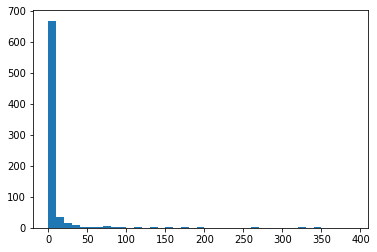

In [215]:
plt.hist(counts, bins=np.arange(0,400,10))
50/sum(counts)*100 # threshold, pick causes ~above this percentage

703


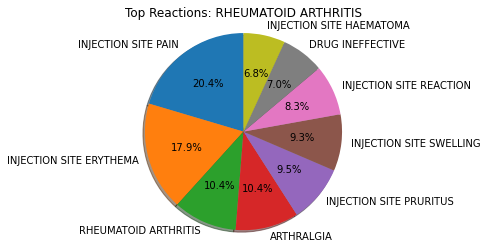

814


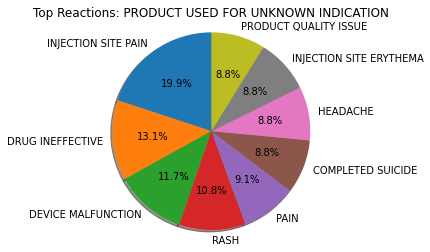

348


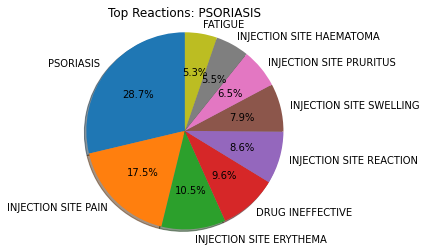

322


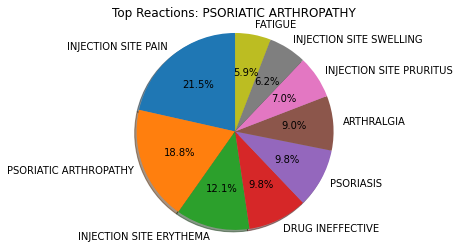

336


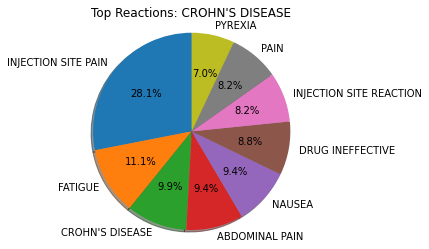

188


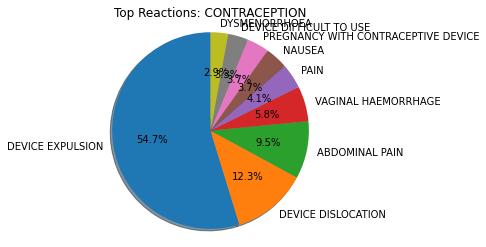

69


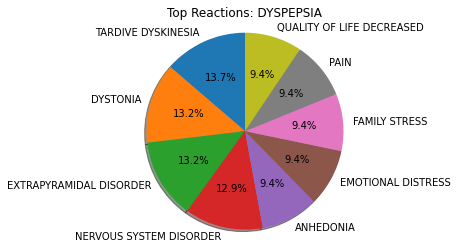

28


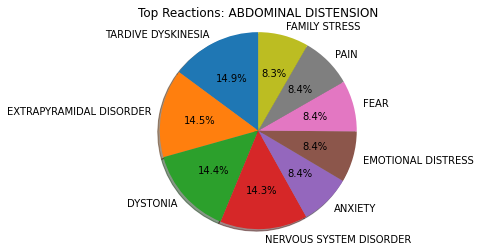

227


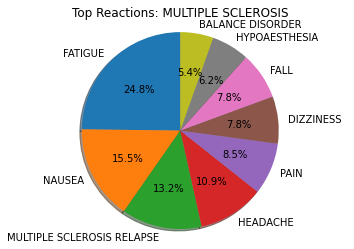

289


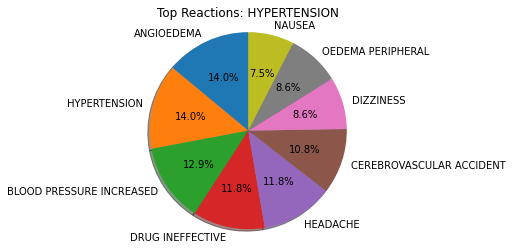

172


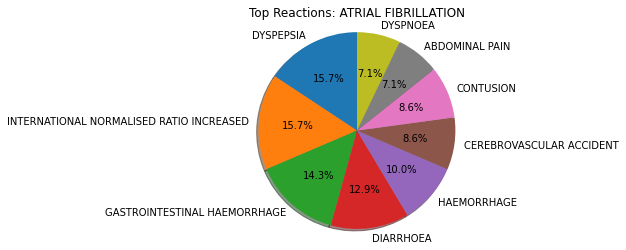

93


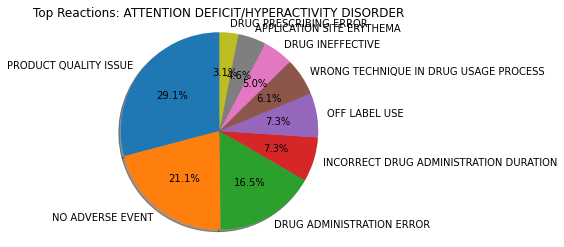

151


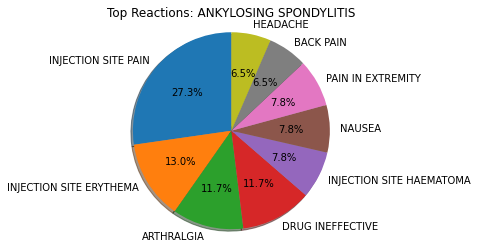

162


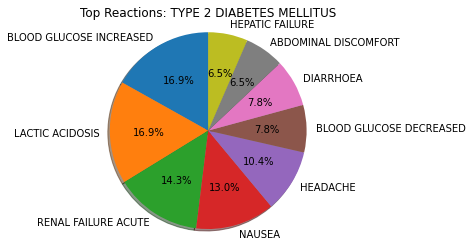

In [308]:
# *** 1. Make pie charts of most common REACTIONS from a given INDICATION
for iIndication in indications[:indicationThreshold]:
    drawTopReactionsForLabel( df3, 'drugIndication', iIndication, threshold=10)

12
1277 1303 12


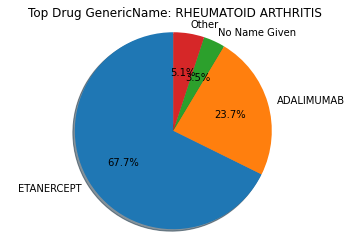

236
1165 1280 236


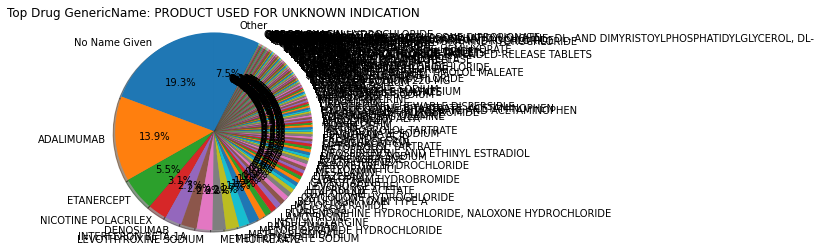

7
476 477 7


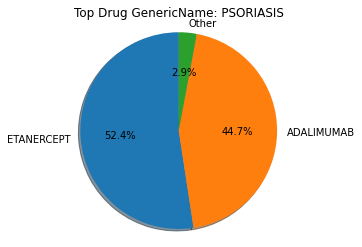

7
342 349 7


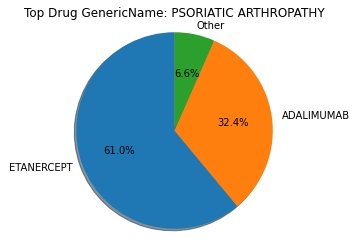

19
321 324 19


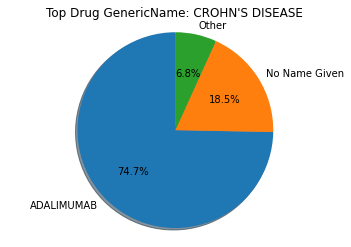

7
265 265 7


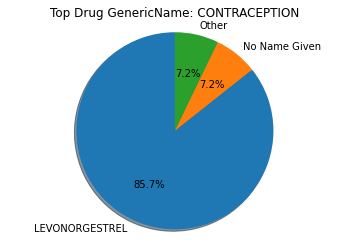

9
196 370 9


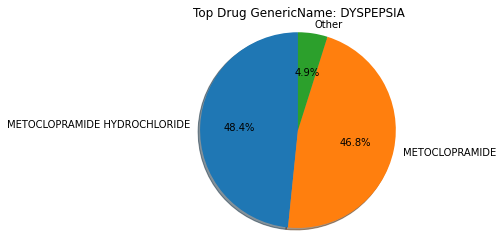

2
194 381 2


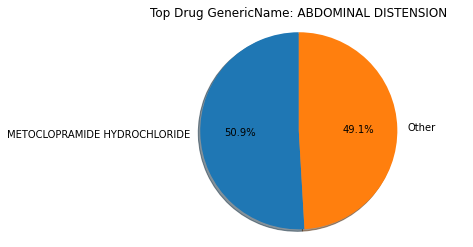

4
170 170 4


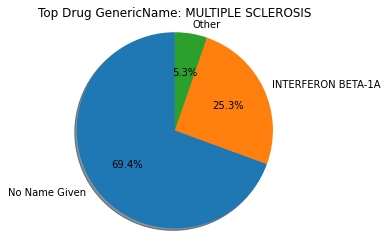

39
157 175 39


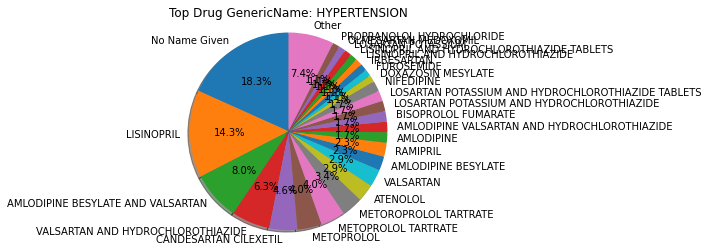

12
138 150 12


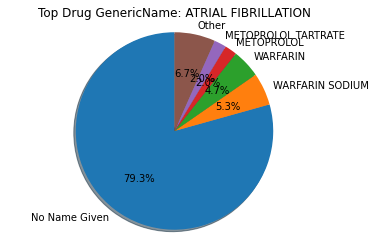

7
117 121 7


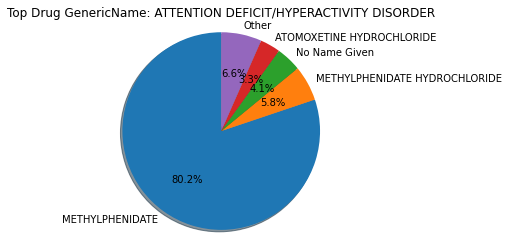

6
116 117 6


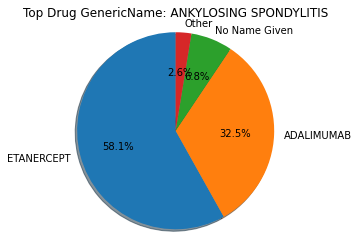

24
93 105 24


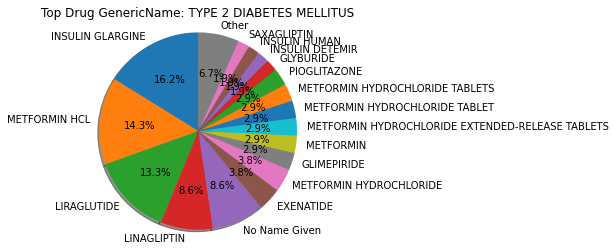

In [322]:
# *** 2. Make pie charts of most common GENERIC_NAME from a given INDICATION
for iIndication in indications[:indicationThreshold]:
    drawTopDrugsForLabel( df3, 'drugIndication', iIndication, 'GenericName', threshold=.925)

16
1277 1332 16


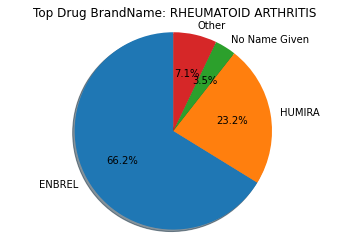

409
1165 1842 409


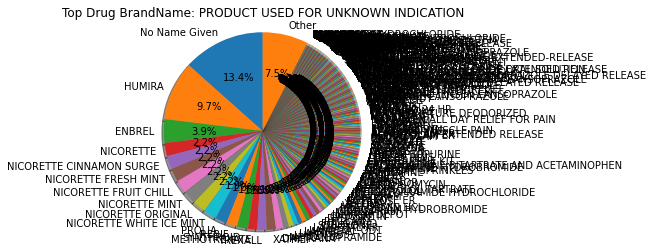

9
476 479 9


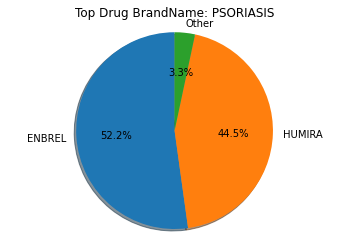

8
342 356 8


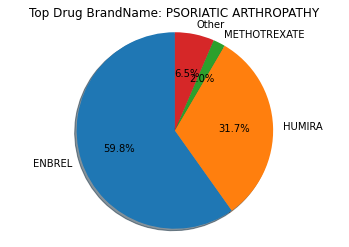

35
321 341 35


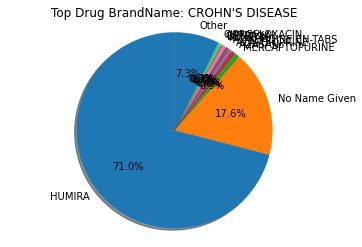

41
265 322 41


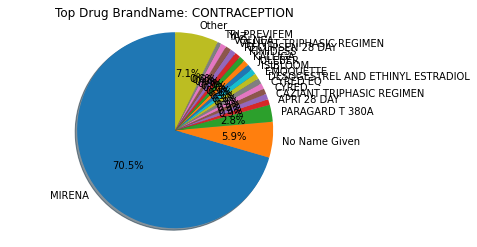

13
196 217 13


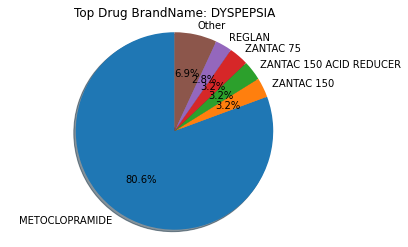

3
194 204 3


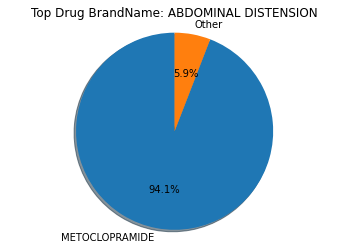

6
170 172 6


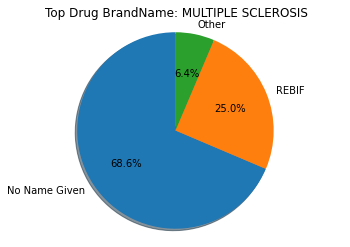

69
157 283 69


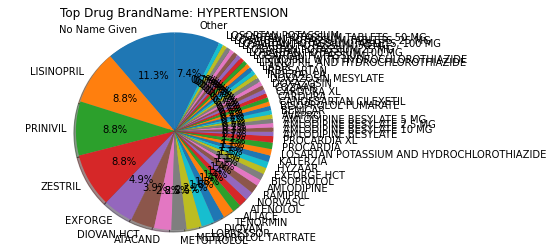

14
138 157 14


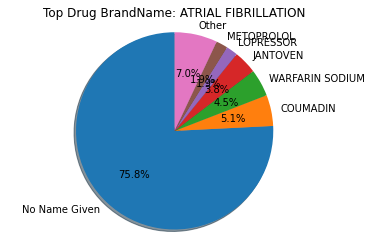

10
117 120 10


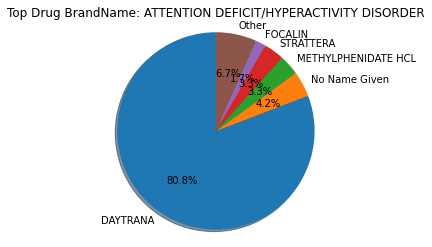

7
116 118 7


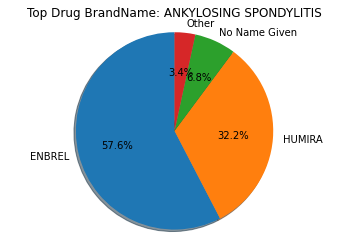

36
93 129 36


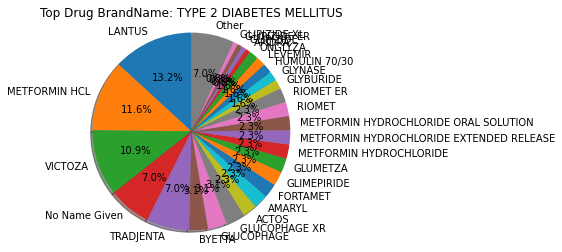

In [323]:
# *** 2. Make pie charts of most common BRAND_NAME from a given INDICATION
for iIndication in indications[:indicationThreshold]:
    drawTopDrugsForLabel( df3, 'drugIndication', iIndication, 'BrandName', threshold=.925)

710
ETANERCEPT: 14.39%
ADALIMUMAB: 11.41%
METOCLOPRAMIDE HYDROCHLORIDE: 5.05%
METOCLOPRAMIDE: 4.82%
LEVONORGESTREL: 3.74%
VARENICLINE TARTRATE: 1.46%
TIOTROPIUM BROMIDE: 1.44%
METHYLPHENIDATE: 1.30%
METHOTREXATE: 1.24%
METHOTREXATE SODIUM: 1.16%
ATORVASTATIN CALCIUM: 1.12%
DENOSUMAB: 1.08%
INTERFERON BETA-1A: 0.97%
DEFERASIROX: 0.94%
Other: 50.82%


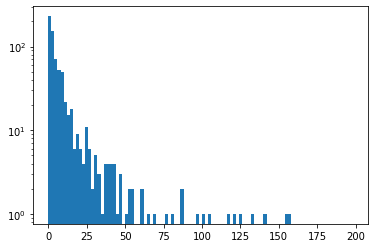

0.07042253521126761
['ETANERCEPT', 'ADALIMUMAB', 'METOCLOPRAMIDE HYDROCHLORIDE', 'METOCLOPRAMIDE', 'LEVONORGESTREL', 'VARENICLINE TARTRATE', 'TIOTROPIUM BROMIDE', 'METHYLPHENIDATE', 'METHOTREXATE', 'METHOTREXATE SODIUM', 'ATORVASTATIN CALCIUM', 'DENOSUMAB', 'INTERFERON BETA-1A', 'DEFERASIROX']
733


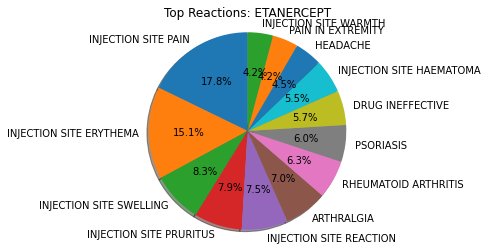

665


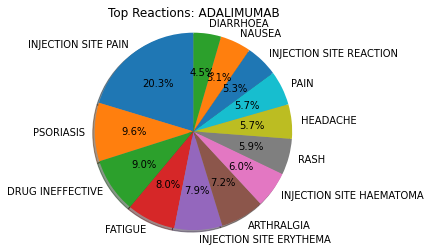

85


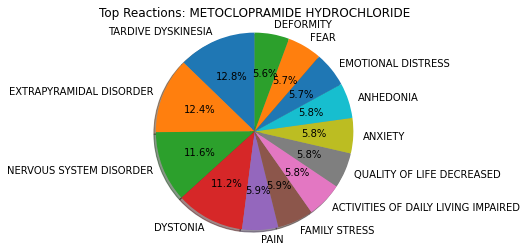

85


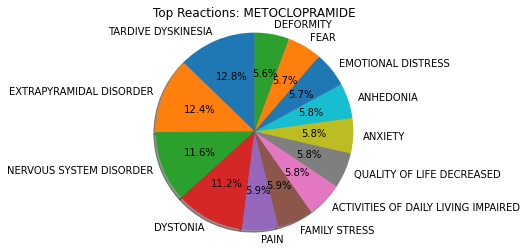

162


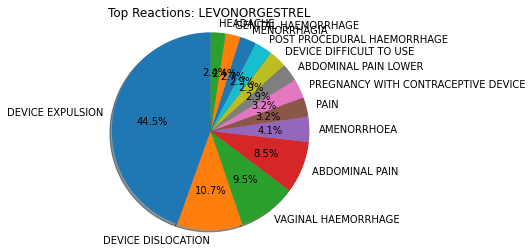

181


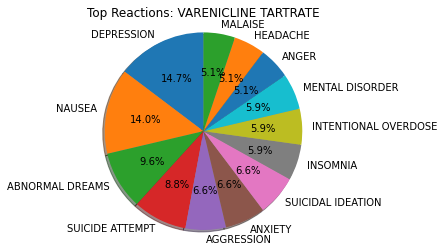

82


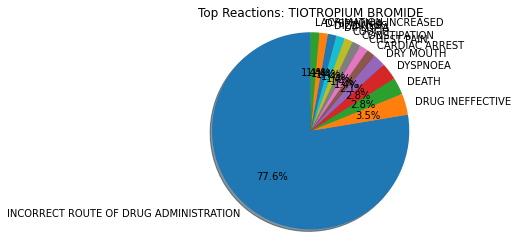

104


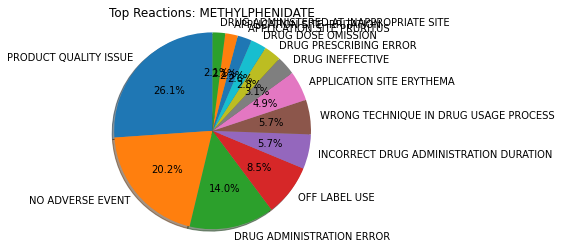

263


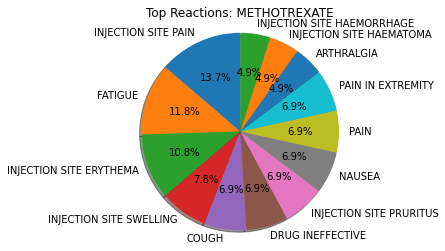

245


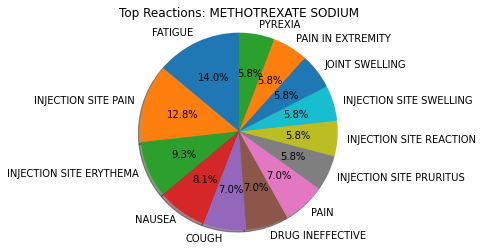

142


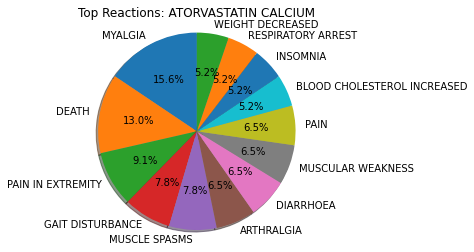

133


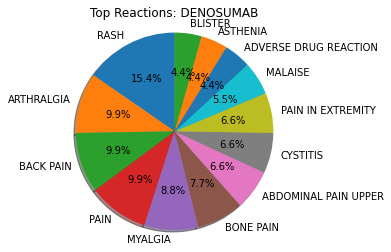

190


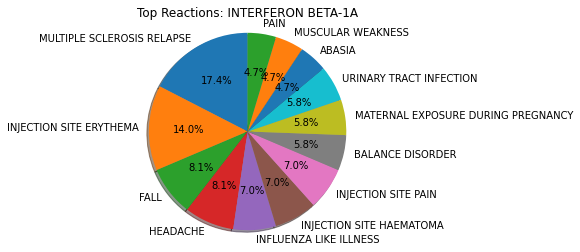

108


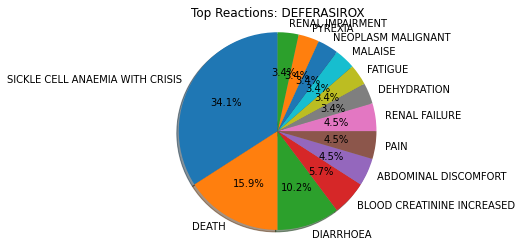

In [383]:
# *** 3. Make pie charts of most common REACTION from a given GENERIC NAME
drugThreshold =14
generics = list(flatten(df3[ df3.drugGenericName != 'No Name Given'].drugGenericName))

# ** A. Make pairs of uniques
(unique, counts) = np.unique( generics, return_counts=True)
frequencies = np.asarray((unique, counts)).T
freq2 = sorted( frequencies, key=lambda pair: int(pair[1]), reverse=True) 
print( len(freq2) )
    
# ** B. Find threshold break
drugs, counts = returnCountsAndLabels( freq2)
threshKey = returnThresholdPoint(counts, drugs, drugThreshold, verbose=True)
    
plt.hist(counts, bins=np.arange(0, 200, 2))
plt.yscale('log')
plt.show()
print(50/len(drugs)) # ignore drugs when percentage ~beneath this level

# ** C. Look at top drugs
topGenerics = drugs[:drugThreshold]
print(topGenerics)

# ** D. Make some plots 
for iGeneric in drugs[:drugThreshold]:
    drawTopReactionsForLabel( df3, 'drugGenericName', iGeneric, threshold=drugThreshold)
    

In [458]:
# *** 4. Look at drug correlation
def returnEncodedDrugVector(eventDrugs, allDrugNames):
    """function to create one-hot encoded vector of drug names for calculating correlation"""
    
    _oneHotVector=[]
    for iDrug in allDrugNames:
        if iDrug in eventDrugs: # found name... probably
            _oneHotVector.append(1)
        else:                   # did not find name
            _oneHotVector.append(0)
    
    #if sum(_oneHotVector)>1:
    #    print( allDrugNames, eventDrugs, _oneHotVector )
    
    return _oneHotVector

def findCorrelatedDrugs(df_matrix, lowCorrThreshold= 0.25):
    """function that returns drug names if 0.1 < correlation < 1.0"""
    
    for iGeneric in df_matrix.columns:
        correlatedDrugs = df_matrix.index[ (np.abs(df_matrix[iGeneric]) > lowCorrThreshold) & (df_matrix[iGeneric]!=1.0)].to_list()
        
        for d in correlatedDrugs:
            shortWord, longWord = (d, iGeneric) if len(d)<len(iGeneric) else (iGeneric, d)
            if longWord.find(shortWord)==-1: # protection for repeated word:
                print('{} correlates with {}, Pearson = {:1.2f}'.format(iGeneric, d, df_matrix.at[iGeneric, d]))

            
#topGenerics = drugs[:20]
topGenerics = drugs
df4 = df3[ df3.drugGenericName!='No Name Given']
genericsVectors = df4.apply( lambda x: returnEncodedDrugVector( x.drugGenericName, topGenerics), axis=1).to_list()
df4_corr = pd.DataFrame( genericsVectors, columns = top20Generics)
df4_corrMatrix = df4_corr.corr(method ='pearson') 

In [459]:
findCorrelatedDrugs( df4_corrMatrix)

ESOMEPRAZOLE MAGNESIUM correlates with ESOMEPRAZOLE SODIUM, Pearson = 0.98
ESOMEPRAZOLE SODIUM correlates with ESOMEPRAZOLE MAGNESIUM, Pearson = 0.98
METOPROLOL correlates with METOROPROLOL TARTRATE, Pearson = 0.95
METOPROLOL TARTRATE correlates with METOROPROLOL TARTRATE, Pearson = 0.95
METOROPROLOL TARTRATE correlates with METOPROLOL, Pearson = 0.95
METOROPROLOL TARTRATE correlates with METOPROLOL TARTRATE, Pearson = 0.95
ESCITALOPRAM OXALATE correlates with ESCITSLOPRAM, Pearson = 0.55
METHYLPHENIDATE HYDROCHLORIDE correlates with METHYLPHENIDATE HCL, Pearson = 0.58
TRIAMCINOLONE ACETONIDE correlates with KENALOG, Pearson = 0.63
HYDROCODONE BITARTRATE AND ACETAMINOPHEN correlates with HYDROCODONE BITARTRATE, ACETAMINOPHEN, Pearson = 0.71
ESCITALOPRAM correlates with ESCITSLOPRAM, Pearson = 0.85
ONDANSETRON HYDROCHLORIDE correlates with ONDANSETRON TABLETS, Pearson = 0.55
ESCITSLOPRAM correlates with ESCITALOPRAM OXALATE, Pearson = 0.55
ESCITSLOPRAM correlates with ESCITALOPRAM, Pear